# Text Mining and Sentiment Analysis in  R

![](https://d1sjtleuqoc1be.cloudfront.net/wp-content/uploads/2019/04/25112909/shutterstock_1073953772.jpg)

# Table of Content :
> ### About R Programming Language
> ### What is Sentiment Analysis?
> ### Importing Library
> ### Loading Dataset
> ### Preprocessing Data
> ### Build Document Matrix
> ### Display Top 5 Words used 
> ### Creating Word Cloud
> ### Word Association
> ### Sentiment Score
> ### Emotion Classifier
> ### Conclusion

### About R Programming Language:
> #### R is a language and environment for statistical computing and graphics. It provides a wide variety of statistical and graphical techniques and is highly extensible.
> #### R is available as free software. It’s easy to learn.
> #### R is helpful at every step of the data analysis process from gathering and cleaning data to analyzing it and reporting the conclusions.
> #### R is a statistical language created by statisticians. Thus, it excels in statistical computation. R is the most used programming language for developing statistical tools.

### What is Sentiment Analysis ?
> #### Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.
> #### Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. Sentiment analysis helps data analysts within large enterprises gauge public opinion, conduct nuanced market research, monitor brand and product reputation, and understand customer experiences.
> #### R has a rich set of packages for Natural Language Processing (NLP) and generating plots. The foundational steps involve loading the text file into an R Corpus, then cleaning and stemming the data before performing analysis. I will demonstrate these steps and analysis like Word Frequency, Word Cloud, Word Association, Sentiment Scores and Emotion Classification using various plots and charts.

## Loading library
### The following packages are used in the examples in this article:
> **Tm** for text mining operations like removing numbers, special characters, punctuations and stop words (Stop words in any language are the most commonly occurring words that have very little value for NLP and should be filtered out. Examples of stop words in English are “the”, “is”, “are”.)

> **Snowballc** for stemming, which is the process of reducing words to their base or root form. For example, a stemming algorithm would reduce the words “fishing”, “fished” and “fisher” to the stem “fish”.

> **wordcloud** for generating the word cloud plot.

> **RColorBrewer** for color palettes used in various plots

> **syuzhet** for sentiment scores and emotion classification

> **ggplot2** for plotting graphs

In [1]:
# Install all the packages if not.
# install.packages("tm")  # for text mining
# install.packages("SnowballC") # for text stemming
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
# install.packages("syuzhet") # for sentiment analysis
# install.packages("ggplot2") # for plotting graphs

# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("syuzhet")
library("ggplot2")
print('Done Importing Library')

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content


Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




[1] "Done Importing Library"


## Loading Dataset
> ### About Data:
> ### X: It represent the ID 
> ### rating: It is the user provided for the Kindle book(it ranges from 1-5).
> ### review.Text: Its the whole review of the Kindle book.
> ### summary: Its a short summary of whole review in short words.

In [2]:
data <- read.csv('../input/amazon-kindle-book-review-for-sentiment-analysis/preprocessed_kindle_review .csv')

In [3]:
# Load the data as a corpus
TextDoc  <- Corpus(VectorSource(data$review))

In [4]:
# Printing number of columns
length(data)

[1] 4

In [5]:
# Name of columns present in the dataset
colnames(data)

[1] "X"          "rating"     "reviewText" "summary"

In [6]:
# Quick View of the data
head(data)

,X,rating,reviewText,summary
,<int>,<int>,<chr>,<chr>
1,0,5,"This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.",50 + years ago...
2,1,1,"When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it. To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read. It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'. Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah. To give an example of what I mean (and there are MANY), Aaron finally finds out almost half way into the book that he fathered a child 5 years ago--keep in mind that Aaron and Jada kept in contact for a few months after he left and she never mentioned to him that she was pregnant. When she finally tells him he has a son, Aaron becomes overwhelmed with emotions (misty eyed) knowing that he's a father. WTH! I think most men would be upset/angry to know that they had a child and the woman they love never told them! Not in this book; it's all good--all is well; NO PASSION. OMG, don't let me get started on the scene when father and son finally meet. It was so over the top, it made me want to barf. Maybe if this scene had been towards the beginning of the book, it would have been touching. In the middle of the book after just too much blah it made me thrown down my kindle. It was like eating a sweet dessert that was so sweet it made your teeth hurt. This book had a good theme, but no follow-through. Also, if we're to believe that Jada graduated from Harvard, then let it be reflected in her speech and her job. We're told that she has this wonderful personality which caused Aaron to fall in love with her--never saw it. If the author had described her as depressed and foolish--Yes! I would believe it in a heartbeat. She was boring. This book was so frustrating to read. I truly struggled to read it as far as I did. I finally stopped torturing myself because I realized it wasn't going to get any better.",Boring! Boring! Boring!
3,2,5,"I just had to edit this review. This book is an (I believe I got this right) an updated re-write. Thank god I didn't get the first version. It has moved into MY top 5 favorite. He (BECHETT DeSAXBY) is also in my top 5 Hero/daydream inducing gents.Didn't expect to like it. Seemed a little too debauched. ha ha ha. I freggin loved it. Matter of fact I'm over 21...well over 21...ran my batteries dead..NOW you know what batteries..I am broadening my reading tastes and buying anything Scottie Barrett writes. AN ABSOLUTE KEEPER (with a large supply of batteries).And for once the cover of that hunk matched the description. You guys can read it premise. What I loved is his portrayal and the FILET MIGNON in depth character study Scottie Barrett did. From the first, with 'Bechett baby' catchin a snooze in the hayloft after an early ""happy ending"" thats AFTER HE WENT OUT AND BROUGHT BACK HIS CASTLE'S meat for the week. At first he seemed like a wastrel. But he's the real deal. In modern times he would be a war hero. He's home from the crusades. He didn't think he would survive. The King suitably and righteously rewards him. He's in his early 30's. Very responsible and loving and enjoyin life. (HELL, I'M WELL OVER 21 AND I'D DO THE SAME THING)He earned it. It's his choice. And he takes it to the max.As I said I'm not doing story premise, but it's about 3 friends. 2 boys and 1 girl. Bechett baby is one of the boys, then his cousin (the other boy) and a girl.They were all raised together. He fell in lo

### Cleaning up Text Data
> #### Cleaning the text data starts with making transformations like removing special characters from the text.
> #### This is done using the tm_map() function to replace special characters like /, @ and | with a space.
> #### The next step is to remove the unnecessary whitespace and convert the text to lower case.
> #### Then remove the stopwords.They are the most commonly occurring words in a language and have very little value in terms of gaining useful information. 
> #### The last step is text stemming. It is the process of reducing the word to its root form. The stemming process simplifies the word to its common origin.


In [7]:
 #Replacing "/", "@" and "|" with space
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
TextDoc <- tm_map(TextDoc, toSpace, "/")
TextDoc <- tm_map(TextDoc, toSpace, "@")
TextDoc <- tm_map(TextDoc, toSpace, "\\|")


Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "\\|"):
“transformation drops documents”


In [8]:
# Convert the text to lower case
TextDoc <- tm_map(TextDoc, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(TextDoc, content_transformer(tolower)):
“transformation drops documents”


In [9]:
# Remove numbers
TextDoc <- tm_map(TextDoc, removeNumbers)

Warning message in tm_map.SimpleCorpus(TextDoc, removeNumbers):
“transformation drops documents”


In [10]:
# Remove english common stopwords
TextDoc <- tm_map(TextDoc, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, stopwords("english")):
“transformation drops documents”


In [11]:
# Remove your own stop word
# specify your custom stopwords as a character vector
TextDoc <- tm_map(TextDoc, removeWords, c("s", "company", "team")) 

Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, c("s", "company", "team")):
“transformation drops documents”


In [12]:
# Remove punctuations
TextDoc <- tm_map(TextDoc, removePunctuation)

Warning message in tm_map.SimpleCorpus(TextDoc, removePunctuation):
“transformation drops documents”


In [13]:
# Eliminate extra white spaces
TextDoc <- tm_map(TextDoc, stripWhitespace)

Warning message in tm_map.SimpleCorpus(TextDoc, stripWhitespace):
“transformation drops documents”


In [14]:
# Text stemming - which reduces words to their root form
TextDoc <- tm_map(TextDoc, stemDocument)

Warning message in tm_map.SimpleCorpus(TextDoc, stemDocument):
“transformation drops documents”


### Building the term document matrix
> #### After cleaning the text data, the next step is to count the occurrence of each word, to identify popular or trending topics. 
> #### Using the function TermDocumentMatrix() from the text mining package, you can build a Document Matrix – a table containing the frequency of words.

In [15]:
# Build a term-document matrix
TextDoc_dtm <- TermDocumentMatrix(TextDoc)
dtm_m <- as.matrix(TextDoc_dtm)
# Sort by descearing value of frequency
dtm_v <- sort(rowSums(dtm_m),decreasing=TRUE)
dtm_d <- data.frame(word = names(dtm_v),freq=dtm_v)
# Display the top 5 most frequent words
head(dtm_d, 5)

,word,freq
,<chr>,<dbl>
book,book,15696
stori,stori,11329
read,read,10921
like,like,6580
one,one,6019


- Here we can see that Top 5 Words which appeared are "book","stori","read","like","one", with there counts how many time they appeared. 

### Plotting the top 5 most frequent words:

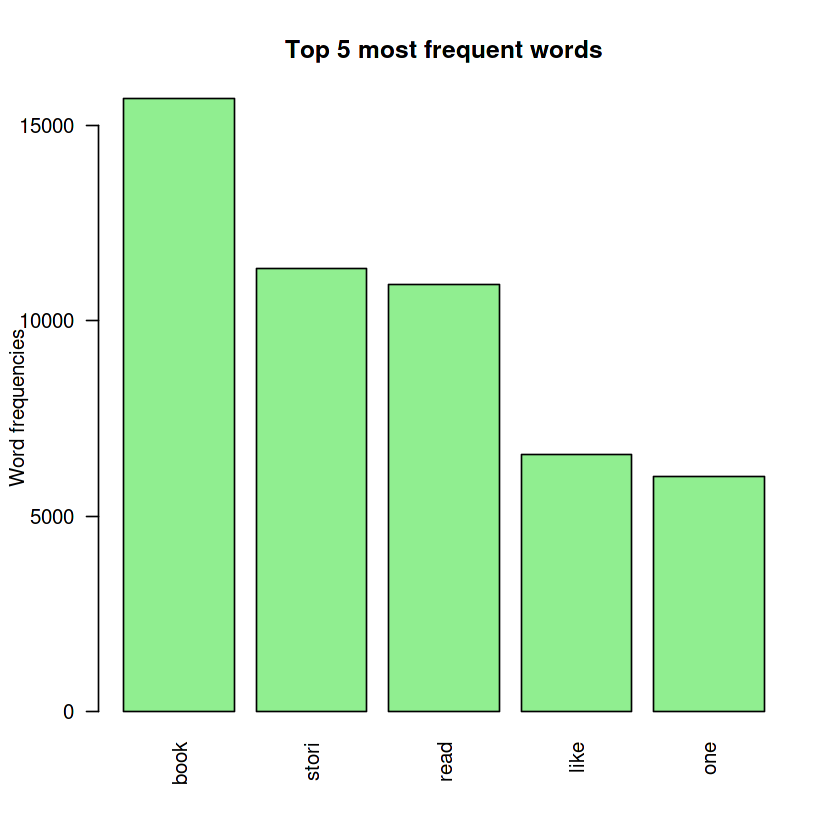

In [16]:
# This is the barchart representation of the Top 5 Words most appeared
barplot(dtm_d[1:5,]$freq, las = 2, names.arg = dtm_d[1:5,]$word,
        col ="lightgreen", main ="Top 5 most frequent words",
        ylab = "Word frequencies")

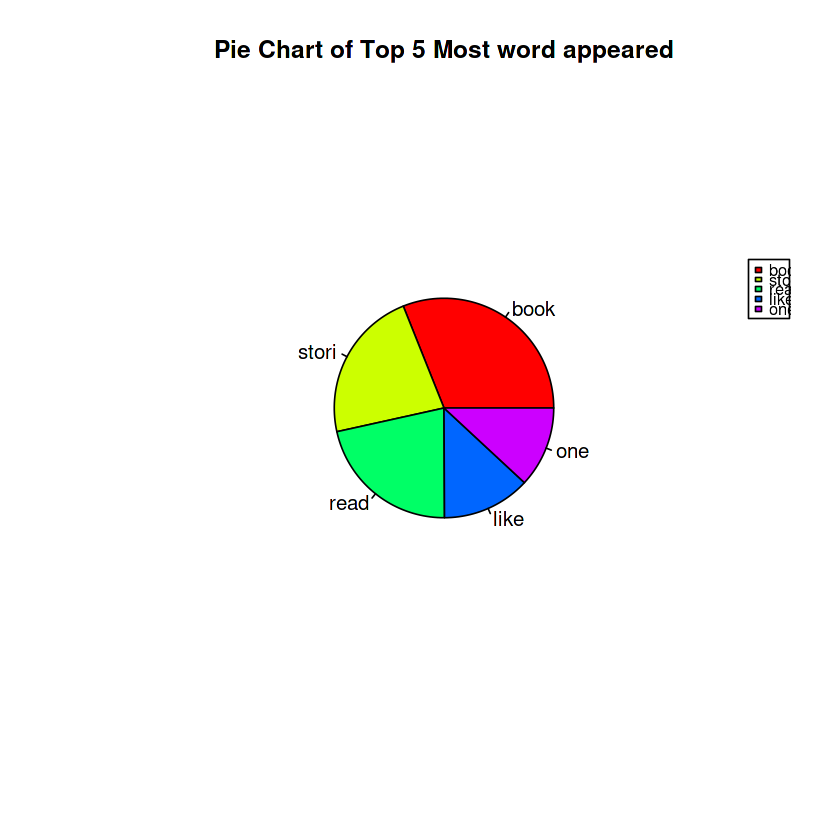

In [17]:
# Creating Pie Chart of Top 5 Most word appeared
x <- c(15696, 11329, 10921,6580,6019)
labels <- c("book", "stori", "read","like","one")

# Plot the chart.
pie(x, labels, main = "Pie Chart of Top 5 Most word appeared", col = rainbow(length(x)))
    legend("topright", c("book","stori","read","like","one"), cex = 0.8,fill = rainbow(length(x)))



### Generating the Word Cloud
> #### A word cloud is one of the most popular ways to visualize and analyze qualitative data.
> #### It’s an image composed of keywords found within a body of text, where the size of each word indicates its frequency in that body of text.
> #### Use the word frequency data frame (table) created previously to generate the word cloud.

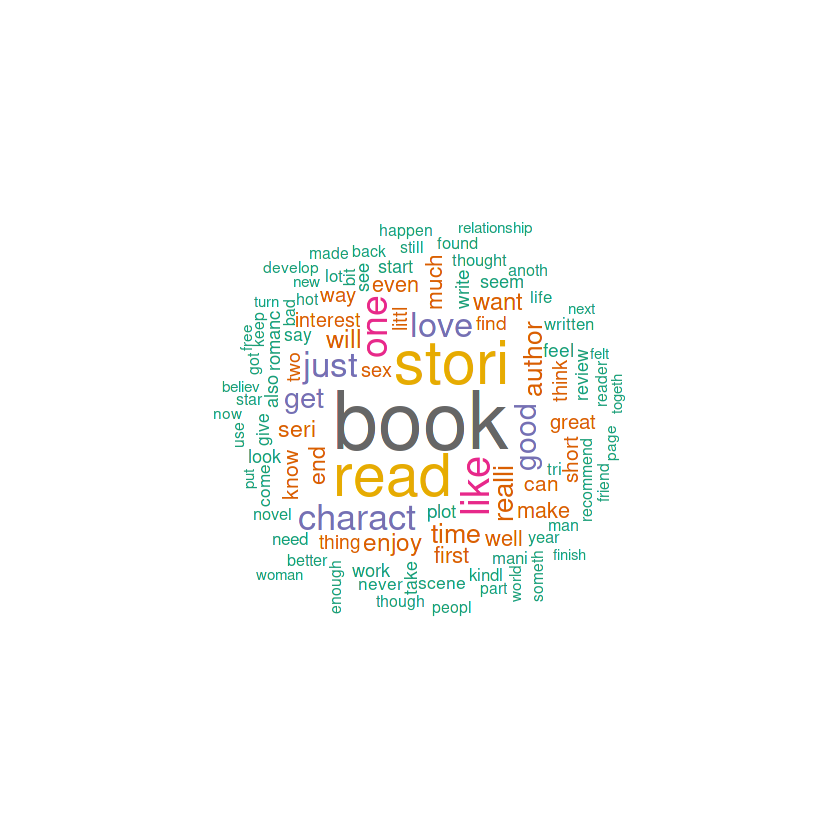

In [18]:
#generate word cloud
set.seed(1234)
wordcloud(words = dtm_d$word, freq = dtm_d$freq, min.freq = 5,
          max.words=100, random.order=FALSE, rot.per=0.40, 
          colors=brewer.pal(8, "Dark2"))

Below is a brief description of the arguments used in the word cloud function;

- words – words to be plotted
- freq – frequencies of words
- min.freq – words whose frequency is at or above this threshold value is plotted (in this case, I have set it to 5)
- max.words – the maximum number of words to display on the plot (in the code above, I have set it 100)
- random.order – I have set it to FALSE, so the words are plotted in order of decreasing frequency
- rot.per – the percentage of words that are displayed as vertical text (with 90-degree rotation). I have set it 0.40 (40 %), please feel free to adjust this setting to suit your preferences
- colors – changes word colors going from lowest to highest frequencies

## Word Association
> ### Correlation is a statistical technique that can demonstrate whether, and how strongly, pairs of variables are related. 
> ### This technique can be used effectively to analyze which words occur most often in association with the most frequently occurring words in the survey responses, which helps to see the context around these words

In [19]:
# Find associations 
findAssocs(TextDoc_dtm, terms = c("book","stori","read"), corlimit = 0.25)

$book
  first    like charact    just    seri     one  author 
   0.34    0.30    0.29    0.29    0.29    0.27    0.26 

$stori
charact   short 
   0.29    0.29 

$read
numeric(0)

- This script shows which words are most frequently associated with the top three terms (corlimit = 0.25 is the lower limit/threshold I have set.
- We can set it lower to see more words, or higher to see less).
- The output indicates that “first” ,“like” ,"charact"(which is root word of character),"just","seri"(which is root word of series),"one" and "author" have occur ~30% of the time with the word “book”.
- Similarly we can say that "charact"(which is root word of character),"short" have occur ~ 30% of the time with the word "stori"(which is root word of stories).

### You can modify the above script to find terms associated with words that occur at least 10 times or more, instead of having to hard code the terms in your script.

In [20]:
# Find associations for words that occur at least 10 times
# findAssocs(TextDoc_dtm, terms = findFreqTerms(TextDoc_dtm, lowfreq = 10), corlimit = 0.25)

### Sentiment Scores
> #### Sentiments can be classified as positive, neutral or negative
> #### They can also be represented on a numeric scale, to better express the degree of positive or negative strength of the sentiment contained in a body of text.
> #### Here we are using the Syuzhet package for generating sentiment scores, which has four sentiment dictionaries and offers a method for accessing the sentiment extraction tool developed in the NLP group at Stanford.
> #### The get_sentiment function accepts two arguments: a character vector (of sentences or words) and a method. 
> #### he selected method determines which of the four available sentiment extraction methods will be used. The four methods are syuzhet (this is the default), bing, afinn and nrc. 
> #### ach method uses a different scale and hence returns slightly different results. Please note the outcome of nrc method is more than just a numeric score.


In [21]:
# regular sentiment score using get_sentiment() function and method of your choice
# please note that different methods may have different scales
syuzhet_vector <- get_sentiment(data$reviewText, method="syuzhet")
# see the first row of the vector
head(syuzhet_vector)
# see summary statistics of the vector
summary(syuzhet_vector)

[1]  1.85  2.60  7.70  5.00  3.10 26.60

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-27.950   0.400   1.650   2.092   3.250  32.450 

### Syuzhet vector
> #### An inspection of the Syuzhet vector shows the first element has the value of 1.85. 
> #### It means the sum of the sentiment scores of all meaningful words in the first response(line) in the text file, adds up to 1.85. The scale for sentiment scores using the syuzhet method is decimal and ranges from -1(indicating most negative) to +1(indicating most positive).
> ####  Note that the summary statistics of the suyzhet vector show a median value of 1.6, which is above zero and can be interpreted as the overall average sentiment across all the responses is positive.

In [22]:
# bing
bing_vector <- get_sentiment(data$reviewText, method="bing")
head(bing_vector)
summary(bing_vector)
#affin
afinn_vector <- get_sentiment(data$reviewText, method="afinn")
head(afinn_vector)
summary(afinn_vector)

[1]  2 -4  6  5 -1 19

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-33.000   0.000   1.000   1.524   3.000  31.000 

[1]  6 -2 14 12  9 36

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-80.000   1.000   4.000   5.147   9.000  77.000 

### Bing and afinn vectors
> #### bing – binary scale with -1 indicating negative and +1 indicating positive sentiment
> #### afinn – integer scale ranging from -5 to +5
> #### The summary statistics of bing and afinn vectors also show that the Median value of Sentiment scores is above 0 and can be interpreted as the overall average sentiment across the all the responses is positive.
> #### Because these different methods use different scales, it’s better to convert their output to a common scale before comparing them. This basic scale conversion can be done easily using R’s built-in sign function, which converts all positive number to 1, all negative numbers to -1 and all zeros remain 0.

In [23]:
#compare the first row of each vector using sign function
rbind(
  sign(head(syuzhet_vector)),
  sign(head(bing_vector)),
  sign(head(afinn_vector))
)

1,1,1,1,1,1
1,-1,1,1,-1,1
1,-1,1,1,1,1


Figure 9. Normalize scale and compare three vectors

Note the first element of each row (vector) is 1, indicating that all three methods have calculated a positive sentiment score, for the first response (line) in the text.

### Emotion Classification
> #### Emotion classification is built on the NRC Word-Emotion Association Lexicon (aka EmoLex).
> #### The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). 
> ####  The get_nrc_sentiments function, which returns a data frame with each row representing a sentence from the original file.
> #### The data frame has ten columns (one column for each of the eight emotions, one column for positive sentiment valence and one for negative sentiment valence).
> #### The data in the columns (anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive) can be accessed individually or in sets. 

In [24]:
# run nrc sentiment analysis to return data frame with each row classified as one of the following
# emotions, rather than a score: 
# anger, anticipation, disgust, fear, joy, sadness, surprise, trust 
# It also counts the number of positive and negative emotions found in each row
d<-get_nrc_sentiment(data$reviewText)
# head(d,10) - to see top 10 lines of the get_nrc_sentiment dataframe
head (d,10)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,1,0,2
2,5,7,4,3,9,7,4,11,11,19
3,2,7,3,4,9,3,4,14,6,21
4,0,2,0,0,3,0,1,4,0,4
5,1,1,0,0,3,0,1,3,2,6
6,4,13,2,9,16,5,5,22,10,45
7,0,4,0,2,4,2,3,9,1,8
8,1,4,1,0,5,2,1,4,2,7
9,3,14,5,6,11,9,9,14,12,19


### Data frame returned by get_nrc_sentiment function

- The next step is to create two plots charts to help visually analyze the emotions in this survey text. 
- First, perform some data transformation and clean-up steps before plotting charts. 
- The first plot shows the total number of instances of words in the text, associated with each of the eight emotions.

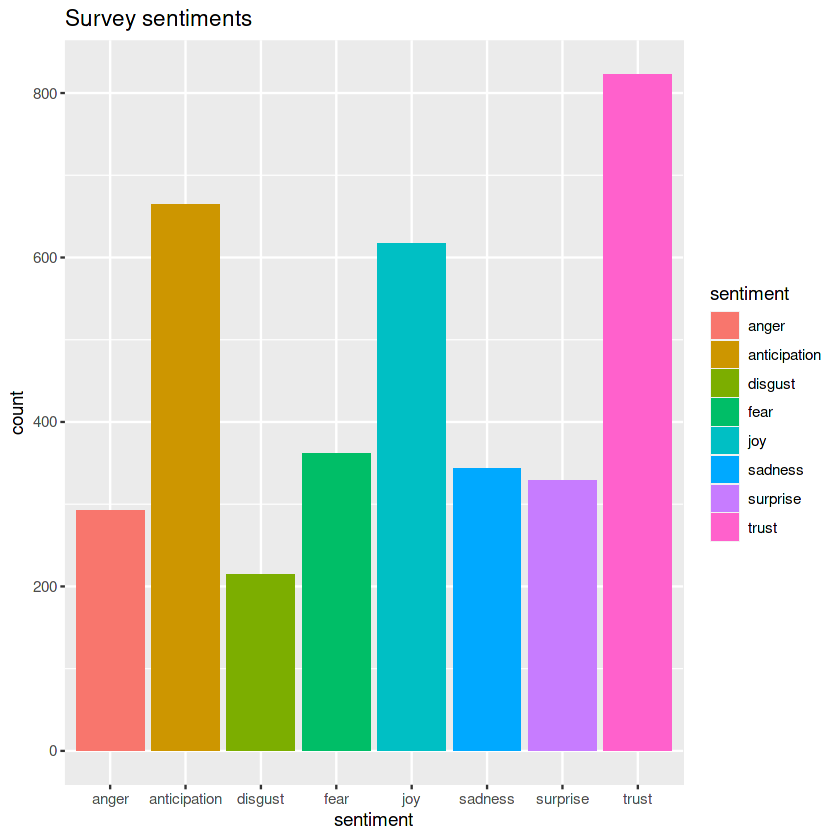

In [25]:
#transpose
td<-data.frame(t(d))
#The function rowSums computes column sums across rows for each level of a grouping variable.
td_new <- data.frame(rowSums(td[2:253]))
#Transformation and cleaning
names(td_new)[1] <- "count"
td_new <- cbind("sentiment" = rownames(td_new), td_new)
rownames(td_new) <- NULL
td_new2<-td_new[1:8,]
#Plot One - count of words associated with each sentiment
quickplot(sentiment, data=td_new2, weight=count, geom="bar", fill=sentiment, ylab="count")+ggtitle("Survey sentiments")

- This bar chart demonstrates that words associated with the positive emotion of “trust” occurred more than eigth hundred times in the review, whereas words associated with the negative emotion of “disgust” occurred ~ 200 times. 
- A deeper understanding of the overall emotions occurring in the survey response can be gained by comparing these number as a percentage of the total number of meaningful words.

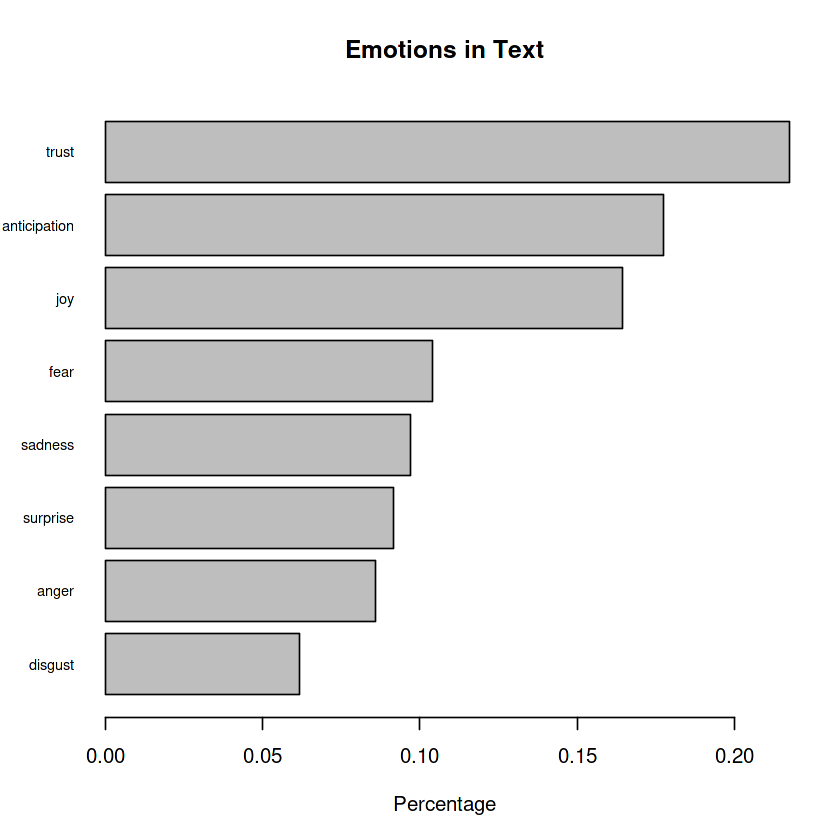

In [26]:
#Plot two - count of words associated with each sentiment, expressed as a percentage
barplot(
  sort(colSums(prop.table(d[, 1:8]))), 
  horiz = TRUE, 
  cex.names = 0.7, 
  las = 1, 
  main = "Emotions in Text", xlab="Percentage"
)

This bar plot allows for a quick and easy comparison of the proportion of words associated with each emotion in the text.

## Conclusion:
> ###  This project was demonstration of how to create a word frequency table and plot a word cloud, to identify prominent themes occurring in the review. 
> ### Word association analysis using correlation, helped gain context around the prominent themes. 
> ### It explored four methods to generate sentiment scores, which proved useful in assigning a numeric value to strength (of positivity or negativity) of sentiments in the text and allowed interpreting that the average sentiment through the text is trending positive.
> ###  Lastly, it demonstrated how to implement an emotion classification with NRC sentiment and created two plots to analyze and interpret emotions found in the text. 

# References:
- R – [Click Here](https://www.r-project.org/)
- Download and install R for windows –[Click Here](https://cran.r-project.org/bin/windows/base/)
- Download and install RStudio – [Click Here](https://rstudio.com/products/rstudio/download/)
- Reading data into R – [Click Here](https://www.stat.berkeley.edu/~spector/s133/Read.html)
- Power BI visuals using R – [Click Here](https://docs.microsoft.com/en-us/power-bi/desktop-r-visuals)
- Natural Language Processing (NLP) –[Click Here]( https://en.wikipedia.org/wiki/Natural_language_processing)
- Stop words – [Click Here](https://en.wikipedia.org/wiki/Stop_words)
- Stemming – [Click Here](https://en.wikipedia.org/wiki/Stemming)
- Word cloud in R – [Click Here](http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know)
- Correlation – [Click Here](https://en.wikipedia.org/wiki/Correlation_and_dependence)
- R Syuzhet Package – [Click Here](https://cran.r-project.org/web/packages/syuzhet/vignettes/syuzhet-vignette.html)
- NRC Emotion lexicon – [Click Here](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)
- Sanil Mhatre’s GitHub Repo for R Script and Demo data file – [Click Here](https://github.com/SQLSuperGuru/SimpleTalkDemo_R)
- Code: [Click Here](https://www.red-gate.com/simple-talk/databases/sql-server/bi-sql-server/text-mining-and-sentiment-analysis-with-r/)